In [1]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      import libraries
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import griddata, UnivariateSpline
from matplotlib.pyplot import * # plotting library
import math
import pylab
from matplotlib import ticker
from mpmath import mp
import mpmath
from numpy import random



In [2]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30})
plt.rcParams.update({'font.size': 20})




In [3]:
## basic parameters


m=85*1.66*1e-27
kb=1.38*1e-23
T=300

In [4]:
## Answers in previous Exercise 5
# the formula of the f(E_k)
def fek(ekinput,Tinput):
    ## ekinput and Tinput are the given kinetic energy and temperature
    ## Here we return the f(E_k) value at a given E_k
    
    return 2*(1.0/(kb*Tinput))**1.5*(ekinput/math.pi)**0.5*(math.e**(-ekinput/(kb*Tinput)))

In [5]:
## Answers in previous Exercise 5
# Generating E_k with accept-reject method

def ekgenerator(Ninput,Tinput):
    ekcut=10*kb*Tinput
    fmax=(2.0/math.pi)**0.5*(1.0/(kb*Tinput))*(math.e**(-0.5)) # The maximum for f(E_k) which we use as the height for the uniform envelope
    ekoutput=list(range(Ninput))
    ii=0
    while ii<Ninput:
        rx=np.random.uniform(0,ekcut)
        ry=np.random.uniform(0,fmax)
        if ry<fek(rx,Tinput):
            ekoutput[ii]=rx
            ii+=1
            
    return ekoutput

    

In [6]:
#Answer 7-1

npar=400
ek=ekgenerator(npar,T)        


In [7]:
## draw the fitting functions

xfit=np.arange(0,5e-20,1e-21)
yfit=fek(xfit,T)



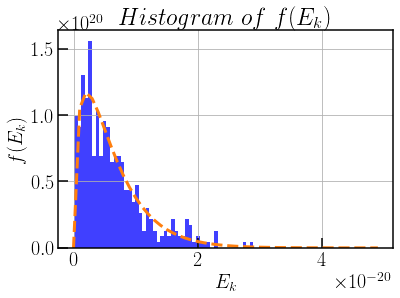

In [8]:
plt.hist(ek, 50, density=True, facecolor='b', alpha=0.75)
plot(xfit,yfit,'--',lw=3)

plt.xlabel(r'$E_k$')
plt.ylabel(r'$f(E_k)$')
plt.title(r'$Histogram\ of\ f(E_k)$')
#plt.text(60, .025)
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.tick_params(direction='in')
plt.grid(True)
plt.show()
    

In [16]:
# Answer 7-2

def LLH(ektest,Ttest):
    Loutput=1
    for i in range(0,len(ektest)):
        Loutput*=fek(ektest[i],Ttest)
    return Loutput

print (LLH(ek,250))

inf


In [17]:
# Answer 7-2

def LLH(ektest,Ttest):
    Loutput=0
    for i in range(0,len(ektest)):
        Loutput+=math.log(fek(ektest[i],Ttest))
    return -Loutput

print (LLH(ek,250))

-18186.78081870779


In [18]:
# Answer 7-3

Testimate=np.linspace(250, 350, 101)

nL=len(Testimate)
L=list(range(nL))

for i in range(0,nL):
    L[i]=LLH(ek,Testimate[i])

imin=L.index(min(L))

In [19]:
print (Testimate[imin],min(L))

312.0 -18202.731823811562


In [20]:
# Answer 7-4

def maxLLH(xestimate,testdata):
    ntest=len(xestimate)
    Ltest=list(range(ntest))
    for i in range(0,ntest):
        Ltest[i]=LLH(testdata,xestimate[i])
    ioutput=Ltest.index(min(Ltest))
    return xestimate[ioutput],ioutput

In [48]:
npar=400
Nexp=200
Tfinal=list(range(Nexp))
ifinal=list(range(Nexp))

for i in range(0,Nexp):
    ek=ekgenerator(npar,T)
    Tfinal[i],ifinal[i]=maxLLH(Testimate,ek)
    


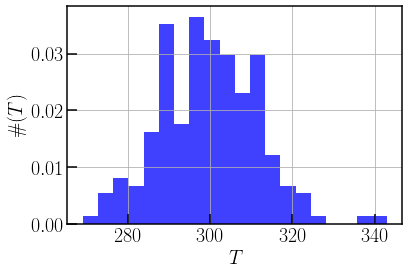

In [49]:
plt.hist(Tfinal, 20, density=True, facecolor='b', alpha=0.75)

plt.xlabel(r'$T$')
plt.ylabel(r'$\#(T)$')
plt.tick_params(direction='in')
plt.grid(True)
plt.show()
    

In [50]:
from scipy.optimize import curve_fit  
import scipy.optimize as spo


def gauss(x, mu, sigma):
    ## Define the Gaussian shape for the fit later
    pref = 1 / sigma / np.sqrt(2 * np.pi)
    return pref * np.exp(- pow(x - mu, 2) / 2 / sigma / sigma)

[299.59620947  12.03852943]


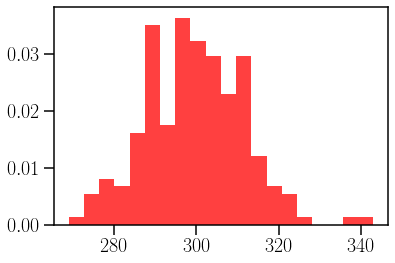

In [51]:
bin_entries, bin_edges, _ =plt.hist(Tfinal, 20, density=True, facecolor='r', alpha=0.75)
bin_centers = np.array([0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)])


popt, pcov = spo.curve_fit(gauss, bin_centers, bin_entries,bounds=([280, 2], [320, 50]))
binfit=gauss(bin_centers, *popt)

print (popt)


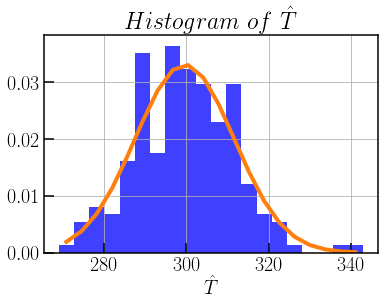

In [52]:
plt.hist(Tfinal, 20, density=True, facecolor='b', alpha=0.75)

plt.plot(bin_centers, binfit, lw=4,
         label='fit: mu=%.2f, sigma=%.2f' % tuple(popt))

plt.xlabel(r'$\hat{T}$')

plt.title(r'$Histogram\ of\ \hat{T}$')
#plt.text(60, .025)
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.tick_params(direction='in')
plt.grid(True)
plt.show()
    

In [53]:
print ('The error of the estimation is:',popt[1]) 

The error of the estimation is: 12.038529427994323


In [54]:
# Answer 7-5
npar=500

nL=len(Testimate)
L=list(range(nL))
ek=ekgenerator(npar,T)

for i in range(0,nL):
    L[i]=LLH(ek,Testimate[i])

imin=L.index(min(L))
Lmin=min(L)
for i in range(0,nL):
    L[i]-=Lmin

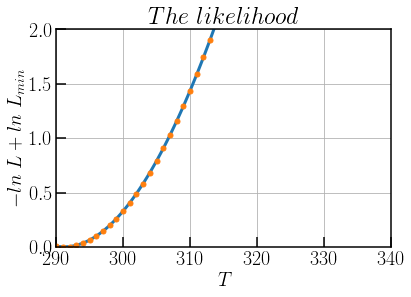

In [55]:
plot(Testimate,L,'-',lw=3)
plot(Testimate,L,'.',ms=10,lw=3)

plt.xlabel(r'$T$')
plt.ylabel(r'$-ln\ L+ln\ L_{min}$')
plt.title(r'$The\ likelihood$')
#plt.text(60, .025)
plt.xlim(290, 340)
plt.ylim(0,2.0)
plt.tick_params(direction='in')
plt.grid(True)
plt.show()
    
    

In [56]:
i1=0
i2=0
for i in range(0,nL-1):
    if L[i]>0.5 and L[i+1]<0.5:
        i1=i
    if L[i]<0.5 and L[i+1]>0.5:
        i2=i

        
print ('The error of the estimation=',(Testimate[i2]-Testimate[i1])/2)
        

The error of the estimation= 11.0
